KERDOUN WASSIM

----------

# CASE STUDY : PORTFOLIO THEORY

- The goal of this case study is to apply different methods of portfolio theory like portfolio optimal weighted allocations, portfolio optimization ...etc
- So, I'll try to work on different types of portfolios (stocks, etfs) using historical data from 2014 to 2024.

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats
from pypfopt import EfficientFrontier, risk_models, expected_returns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16,6)

In [547]:
sectors = {
    'Technology': 'AAPL',  # Apple
    'Healthcare': 'JNJ',  # Johnson & Johnson
    'Finance': 'JPM',  # JPMorgan Chase
    'Consumer Discretionary': 'AMZN',  # Amazon
    'Communication Services': 'GOOGL',  # Alphabet (Google)
    'Utilities': 'NEE',  # NextEra Energy
    'Energy': 'XOM',  # Exxon Mobil
    'Materials': 'LIN',  # Linde
    'Real Estate': 'PLD',  # Prologis
    'Consumer Staples': 'PG',  # Procter & Gamble
    'Industrials': 'UNP'  # Union Pacific
}

startDate = '2014-01-01'
endDate = '2024-01-01'
data = pd.DataFrame()

for sector in sectors.keys():
    
    data[sectors[sector]] = yf.download(sectors[sector],startDate,endDate)['Adj Close']
    
data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,JNJ,JPM,AMZN,GOOGL,NEE,XOM,LIN,PLD,PG,UNP
Date,,,,,,,,,,,
2014-01-02,17.253252,68.264893,43.550621,19.898500,27.823923,16.040178,63.254982,105.902710,27.181408,59.287167,66.346550
2014-01-03,16.874273,68.879814,43.887280,19.822001,27.620953,16.061123,63.102814,106.049904,27.424421,59.220928,66.243317
2014-01-06,16.966288,69.239784,44.141655,19.681499,27.928907,16.068735,63.197910,105.894562,27.542252,59.360783,65.572327
2014-01-07,16.844952,70.709633,43.632912,19.901501,28.467329,16.186779,64.092056,106.507866,27.785269,59.934952,66.152000
2014-01-08,16.951635,70.612137,44.044407,20.096001,28.526569,16.238186,63.882774,107.072121,27.748449,59.066341,66.275070
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,192.868149,153.051376,164.497742,153.419998,141.327805,58.827003,99.358162,408.218384,130.304260,142.584457,240.955612
2023-12-26,192.320221,153.720825,165.470551,153.410004,141.357773,59.279900,99.582405,407.413361,131.347488,143.232239,242.647171
2023-12-27,192.419830,153.927582,166.463043,153.339996,140.209076,59.644188,99.114418,408.685516,132.056091,143.350006,243.161591


In [548]:
data.describe()

,AAPL,JNJ,JPM,AMZN,GOOGL,NEE,XOM,LIN,PLD,PG,UNP
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,75.697797,118.413793,90.955578,84.406266,69.073856,45.415337,62.743338,188.791208,71.407044,95.890397,139.779314
std,56.516655,30.317097,35.259588,51.398466,36.591042,21.978316,18.569838,92.156171,35.931122,32.334458,54.824821
min,15.589163,64.957764,40.136002,14.347500,24.824511,16.040178,25.236973,82.209244,26.886837,52.898449,56.925571
25%,27.128775,92.390577,52.919288,36.370999,38.482587,24.587114,54.493730,106.195606,39.703587,66.255123,87.871023
50%,45.917526,116.338333,90.041290,86.808502,57.156652,38.927752,58.604897,150.041031,57.821718,80.440670,134.427917
75%,132.151112,149.174938,120.467075,127.122501,99.855400,68.282106,63.657266,275.750900,103.664532,127.036081,193.470554
max,197.361084,174.296143,167.347443,186.570496,149.666733,87.526680,116.128258,424.100311,162.293381,154.303574,262.306335


<Axes: xlabel='Date'>

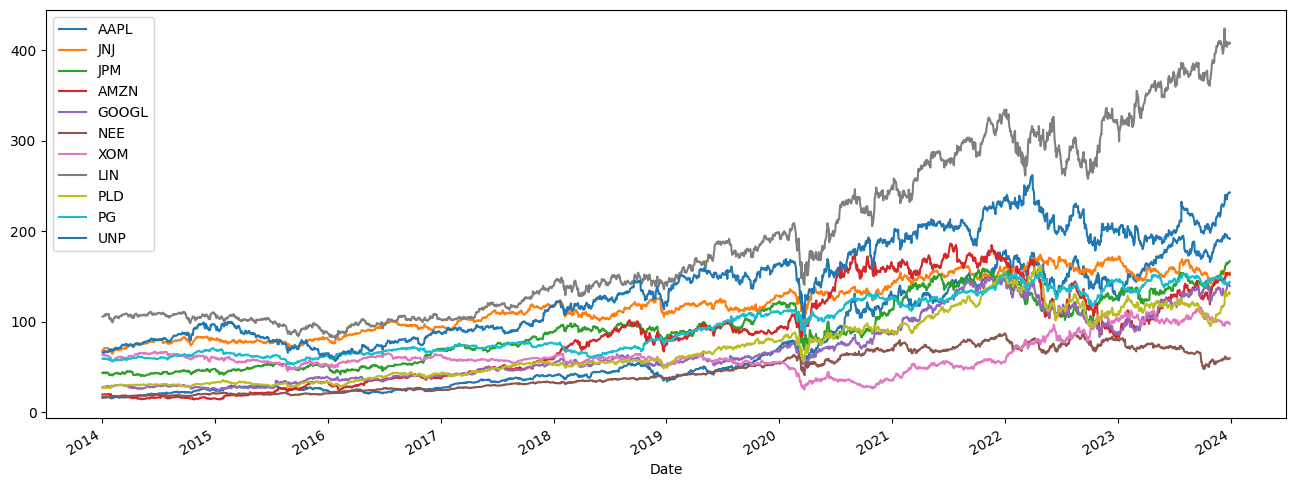

In [549]:
data.plot()

In [550]:
tickers = []

for ticker in sectors.keys():
    tickers.append(sectors[ticker])

In [551]:
returns = pd.DataFrame()

for ticker in data.columns:
    
    returns[ticker+'_Return'] = data[ticker].pct_change().dropna()
    
returns

,AAPL_Return,JNJ_Return,JPM_Return,AMZN_Return,GOOGL_Return,NEE_Return,XOM_Return,LIN_Return,PLD_Return,PG_Return,UNP_Return
Date,,,,,,,,,,,
2014-01-03,-0.021966,0.009008,0.007730,-0.003845,-0.007295,0.001306,-0.002406,0.001390,0.008940,-0.001117,-0.001556
2014-01-06,0.005453,0.005226,0.005796,-0.007088,0.011149,0.000474,0.001507,-0.001465,0.004297,0.002362,-0.010129
2014-01-07,-0.007152,0.021228,-0.011525,0.011178,0.019278,0.007346,0.014148,0.005792,0.008823,0.009673,0.008840
2014-01-08,0.006333,-0.001379,0.009431,0.009773,0.002081,0.003176,-0.003265,0.005298,-0.001325,-0.014493,0.001860
2014-01-09,-0.012770,0.006053,-0.001869,-0.002264,-0.009630,0.008559,-0.009728,0.000535,-0.012739,0.002243,0.014018
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,0.004004,-0.000597,-0.002730,0.007620,0.002517,0.001769,0.003935,0.010996,0.007070,0.006072
2023-12-26,-0.002841,0.004374,0.005914,-0.000065,0.000212,0.007699,0.002257,-0.001972,0.008006,0.004543,0.007020
2023-12-27,0.000518,0.001345,0.005998,-0.000456,-0.008126,0.006145,-0.004699,0.003123,0.005395,0.000822,0.002120


<Axes: >

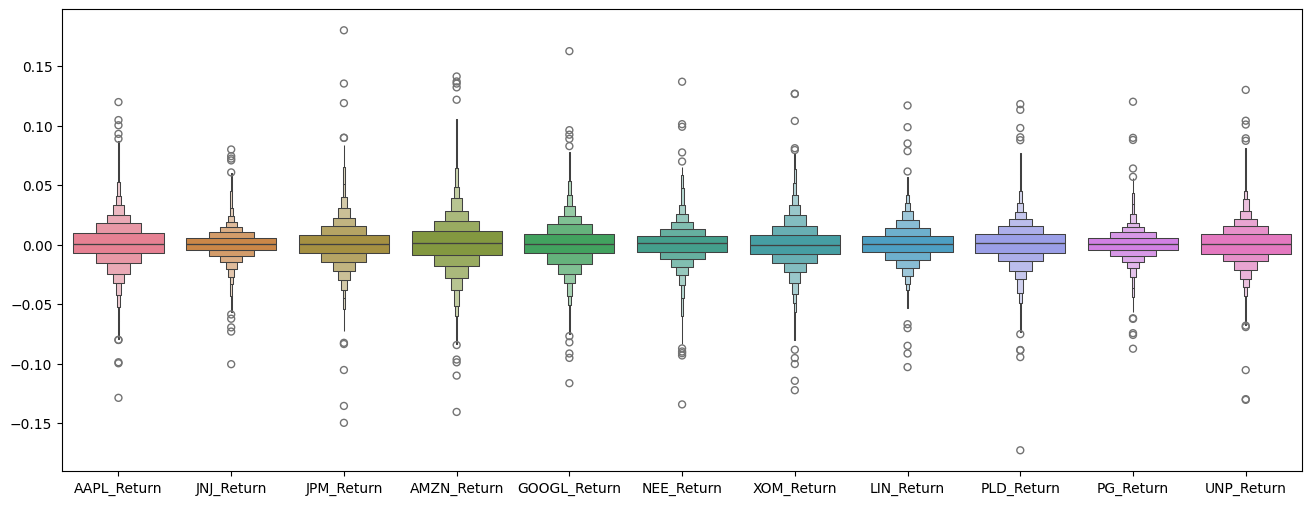

In [552]:
sns.boxenplot(returns)

In [553]:
log_returns = pd.DataFrame()

for ticker in data.columns:
    
    log_returns[ticker+'_LogReturn'] = np.log(data[ticker]/data[ticker].shift(1)).dropna()
    
log_returns

,AAPL_LogReturn,JNJ_LogReturn,JPM_LogReturn,AMZN_LogReturn,GOOGL_LogReturn,NEE_LogReturn,XOM_LogReturn,LIN_LogReturn,PLD_LogReturn,PG_LogReturn,UNP_LogReturn
Date,,,,,,,,,,,
2014-01-03,-0.022210,0.008968,0.007701,-0.003852,-0.007322,0.001305,-0.002409,0.001389,0.008901,-0.001118,-0.001557
2014-01-06,0.005438,0.005212,0.005779,-0.007113,0.011088,0.000474,0.001506,-0.001466,0.004287,0.002359,-0.010181
2014-01-07,-0.007177,0.021006,-0.011592,0.011116,0.019095,0.007319,0.014049,0.005775,0.008785,0.009626,0.008801
2014-01-08,0.006313,-0.001380,0.009387,0.009726,0.002079,0.003171,-0.003271,0.005284,-0.001326,-0.014599,0.001859
2014-01-09,-0.012853,0.006035,-0.001870,-0.002267,-0.009677,0.008522,-0.009776,0.000535,-0.012821,0.002240,0.013920
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.005563,0.003996,-0.000597,-0.002734,0.007591,0.002514,0.001768,0.003927,0.010936,0.007046,0.006053
2023-12-26,-0.002845,0.004364,0.005896,-0.000065,0.000212,0.007669,0.002254,-0.001974,0.007974,0.004533,0.006996
2023-12-27,0.000518,0.001344,0.005980,-0.000456,-0.008159,0.006126,-0.004711,0.003118,0.005380,0.000822,0.002118


In [554]:
log_returns.describe()

,AAPL_LogReturn,JNJ_LogReturn,JPM_LogReturn,AMZN_LogReturn,GOOGL_LogReturn,NEE_LogReturn,XOM_LogReturn,LIN_LogReturn,PLD_LogReturn,PG_LogReturn,UNP_LogReturn
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.000958,0.000324,0.000535,0.000808,0.000641,0.000523,0.000172,0.000536,0.000626,0.000352,0.000516
std,0.017885,0.011359,0.016947,0.020857,0.017537,0.014846,0.017397,0.014353,0.016254,0.011475,0.016162
min,-0.137708,-0.105781,-0.162106,-0.151398,-0.123685,-0.144067,-0.130391,-0.108513,-0.189596,-0.091428,-0.139658
25%,-0.007166,-0.004837,-0.007257,-0.008704,-0.007416,-0.006278,-0.007981,-0.006533,-0.007023,-0.004846,-0.007480
50%,0.000943,0.000345,0.000528,0.001083,0.000960,0.001189,0.000123,0.000492,0.001215,0.000578,0.000622
75%,0.010109,0.005980,0.008412,0.011139,0.009273,0.007560,0.008500,0.007664,0.009094,0.005985,0.008708
max,0.113157,0.076940,0.165620,0.132178,0.150645,0.128309,0.119442,0.110599,0.111634,0.113409,0.122255


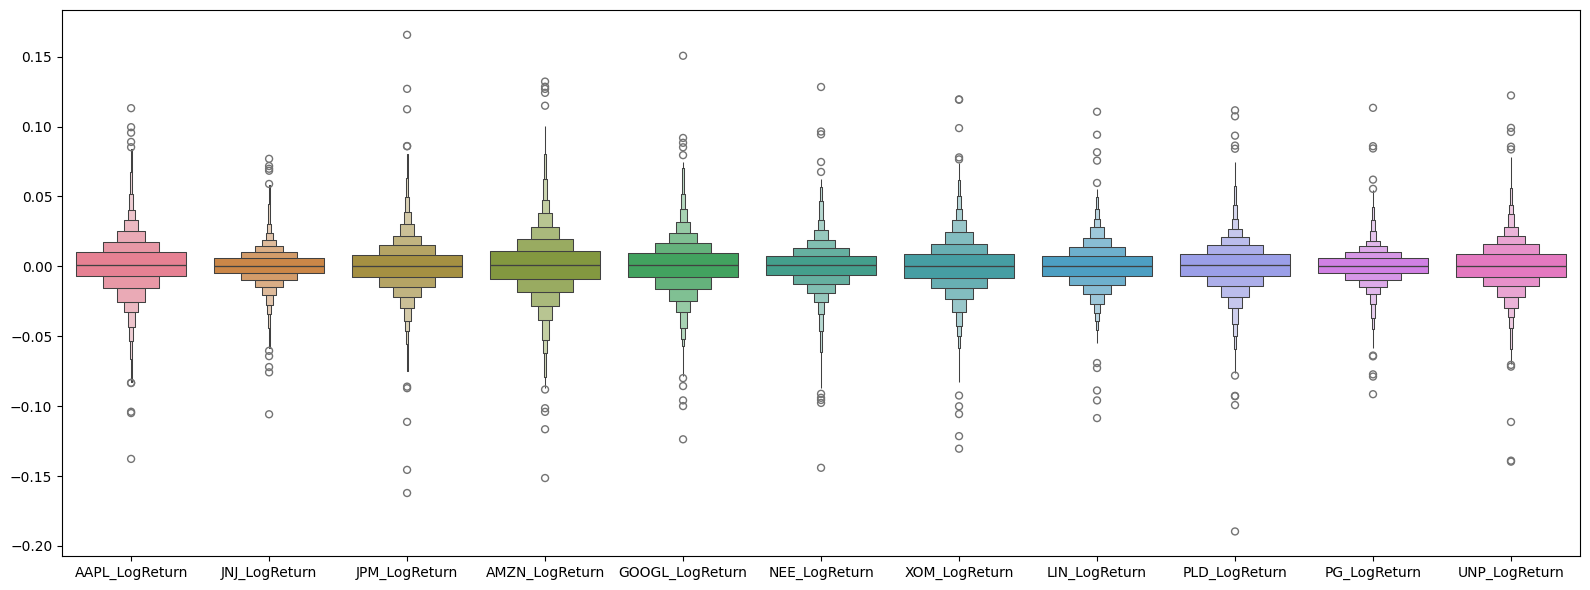

In [555]:
sns.boxenplot(log_returns)

plt.tight_layout()

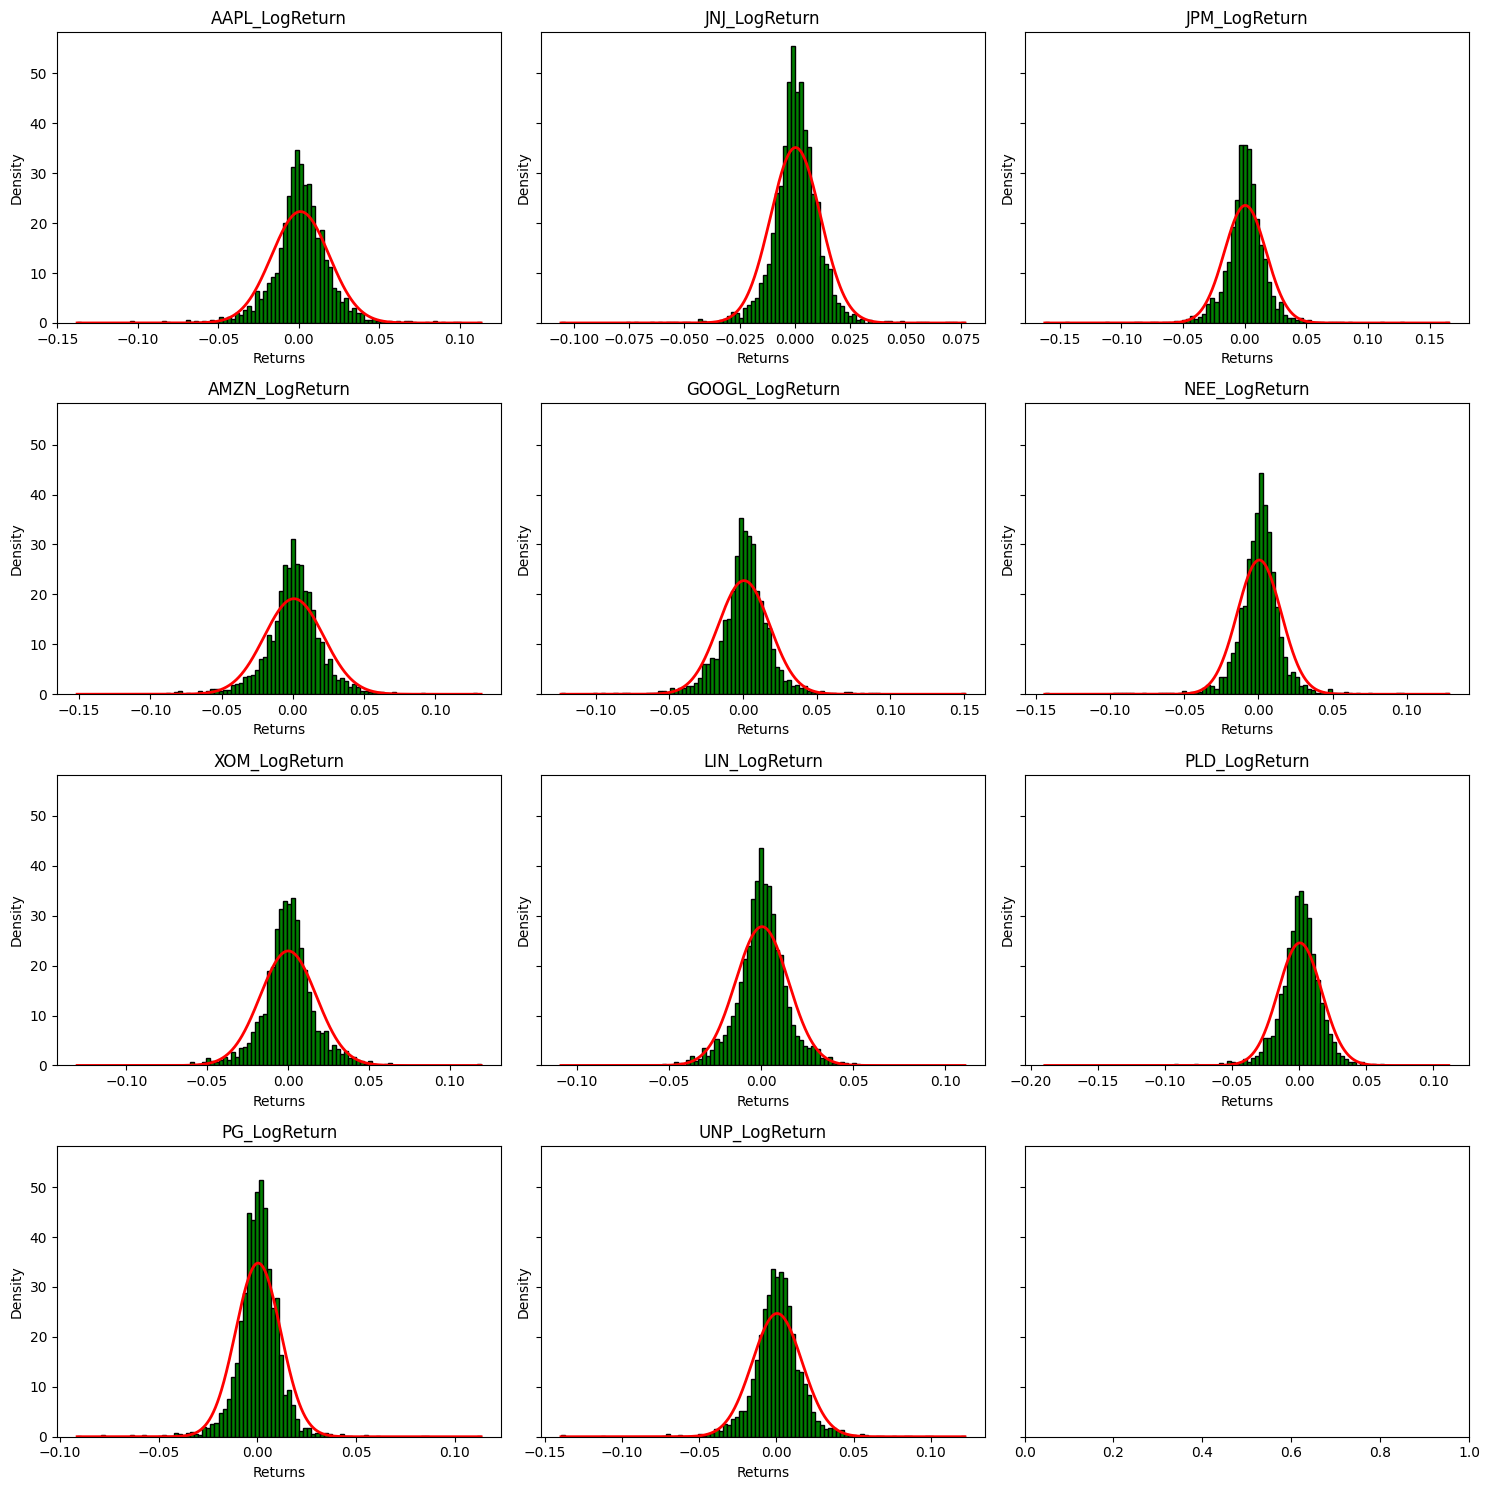

In [556]:
fig, axes = plt.subplots(4,3,sharey=True,figsize=(15,15))

axes= axes.flatten()

for i, ticker in enumerate(log_returns.columns):
    # Plot histogram of returns
    mu,std = stats.norm.fit(log_returns[ticker])
    xmax,xmin = log_returns[ticker].max(),log_returns[ticker].min()
    
    x = np.linspace(xmin, xmax, 1000)
    y = stats.norm.pdf(x, mu, std)
    
    
    axes[i].hist(log_returns[ticker], bins=100, color='green', density=True,edgecolor='black')
    
    axes[i].plot(x,y,lw=2,color='red')
    axes[i].set_title(ticker)
    
    axes[i].set_xlabel('Returns')
    axes[i].set_ylabel('Density')
    
plt.tight_layout()

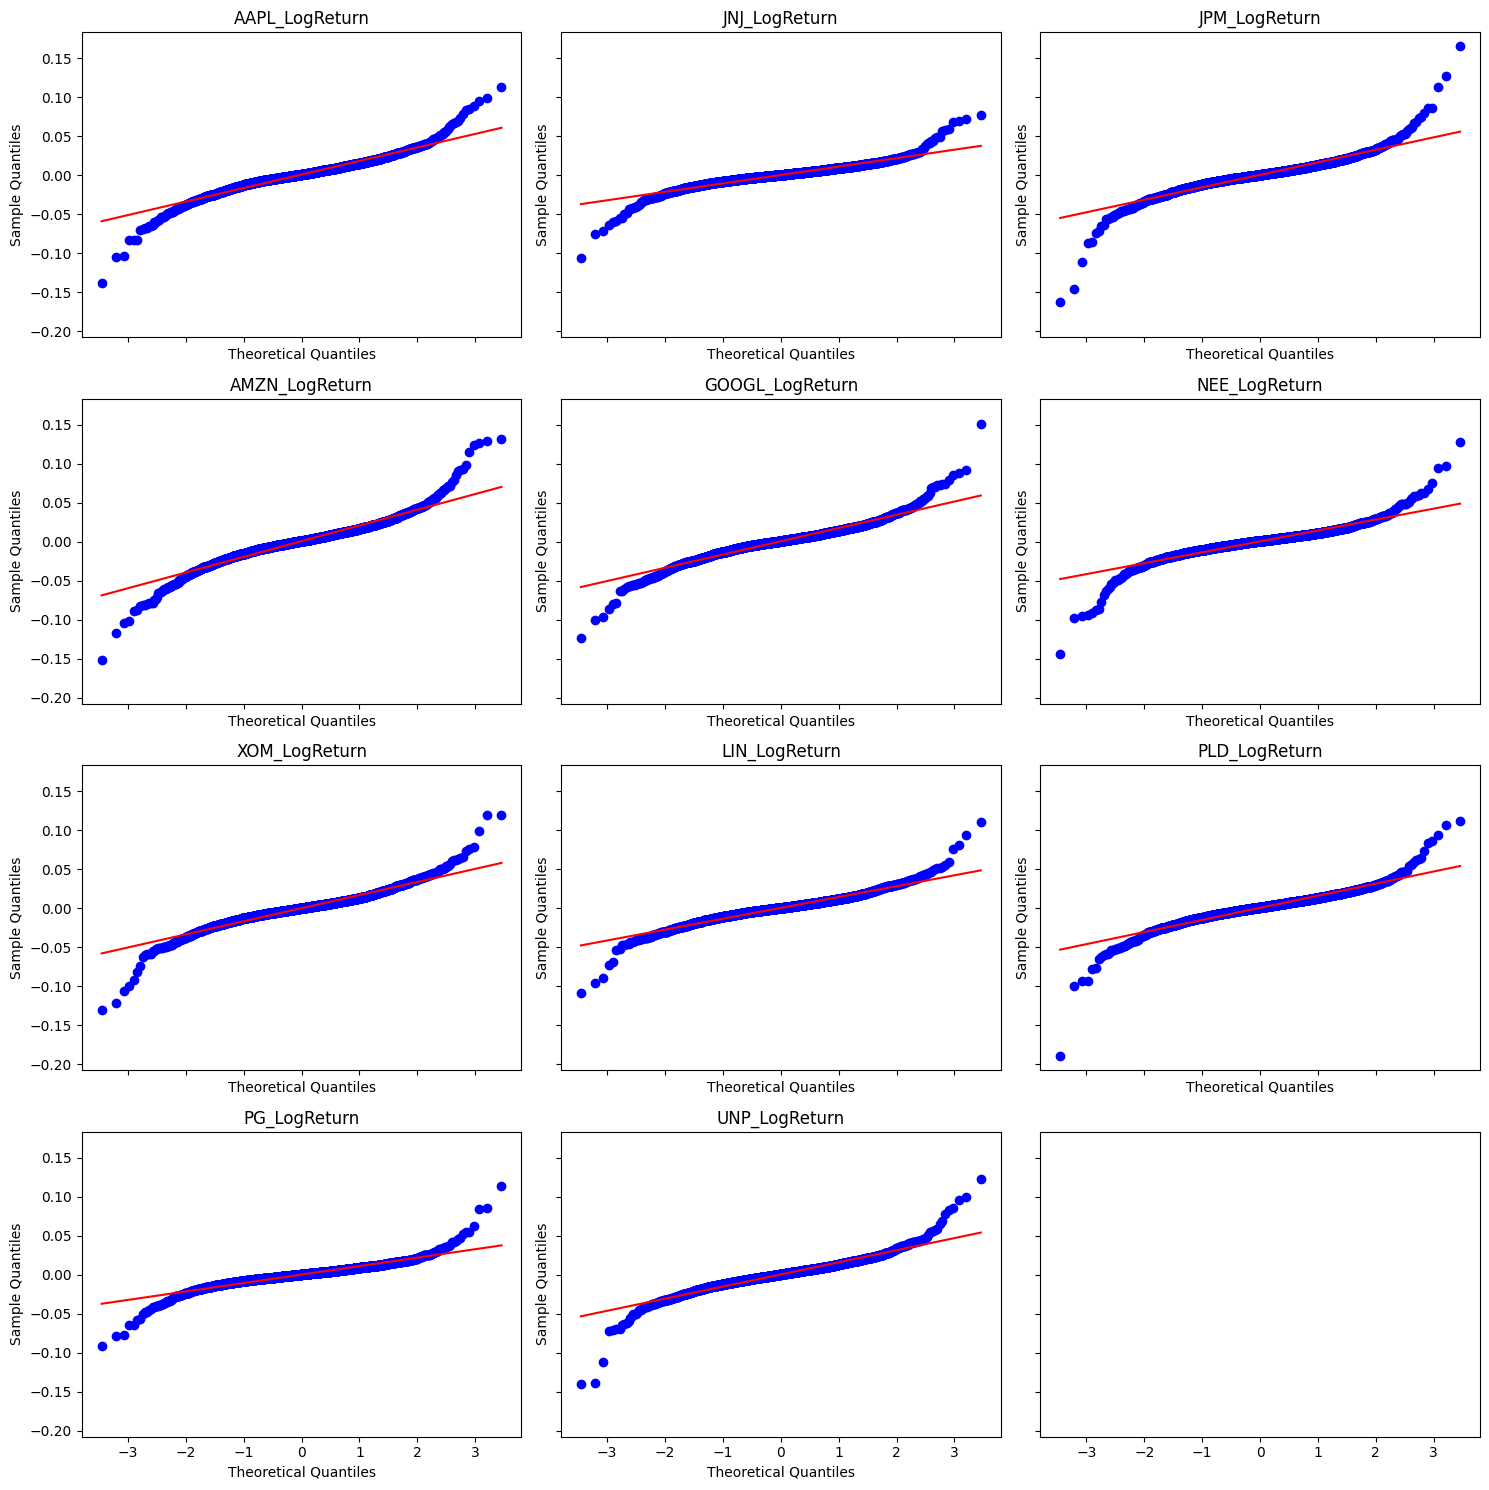

In [557]:
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(15, 15))

axes = axes.flatten()

for i, ticker in enumerate(log_returns.columns):
    
    stats.probplot(log_returns[ticker], dist="norm",plot=axes[i])
    axes[i].set_title(ticker)
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()

<Axes: >

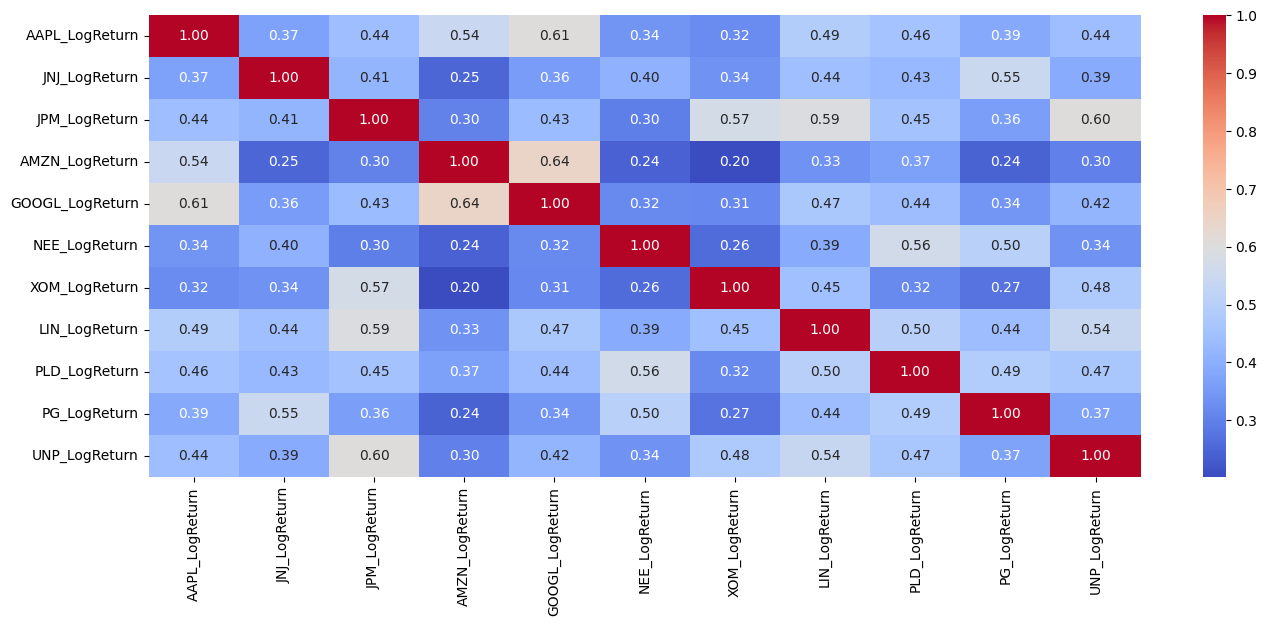

In [558]:
sns.heatmap(log_returns.corr(),annot=True,
            cmap='coolwarm',fmt='.2f')

In [559]:
high_corr_pairs = []

for i in range(len(returns.corr().columns)):
    for j in range(i+1,len(returns.corr().columns)):
        if returns.corr().iloc[i,j] >= 0.5:
            high_corr_pairs.append((returns.corr().columns[i],returns.corr().columns[j],returns.corr().iloc[i,j]))

print('Pairs with correlation higher than 0.5:')
print('-'*50)         
high_corr_pairs

Pairs with correlation higher than 0.5:
--------------------------------------------------


[('AAPL_Return', 'AMZN_Return', 0.5418263774009853),
 ('AAPL_Return', 'GOOGL_Return', 0.6020614029010264),
 ('JNJ_Return', 'PG_Return', 0.5475252270716114),
 ('JPM_Return', 'XOM_Return', 0.5668814734006627),
 ('JPM_Return', 'LIN_Return', 0.5888346917542165),
 ('JPM_Return', 'UNP_Return', 0.6007801177122),
 ('AMZN_Return', 'GOOGL_Return', 0.6416250563622793),
 ('NEE_Return', 'PLD_Return', 0.5673521885390189),
 ('NEE_Return', 'PG_Return', 0.5035702848198571),
 ('LIN_Return', 'UNP_Return', 0.5355228878088201)]

<Axes: >

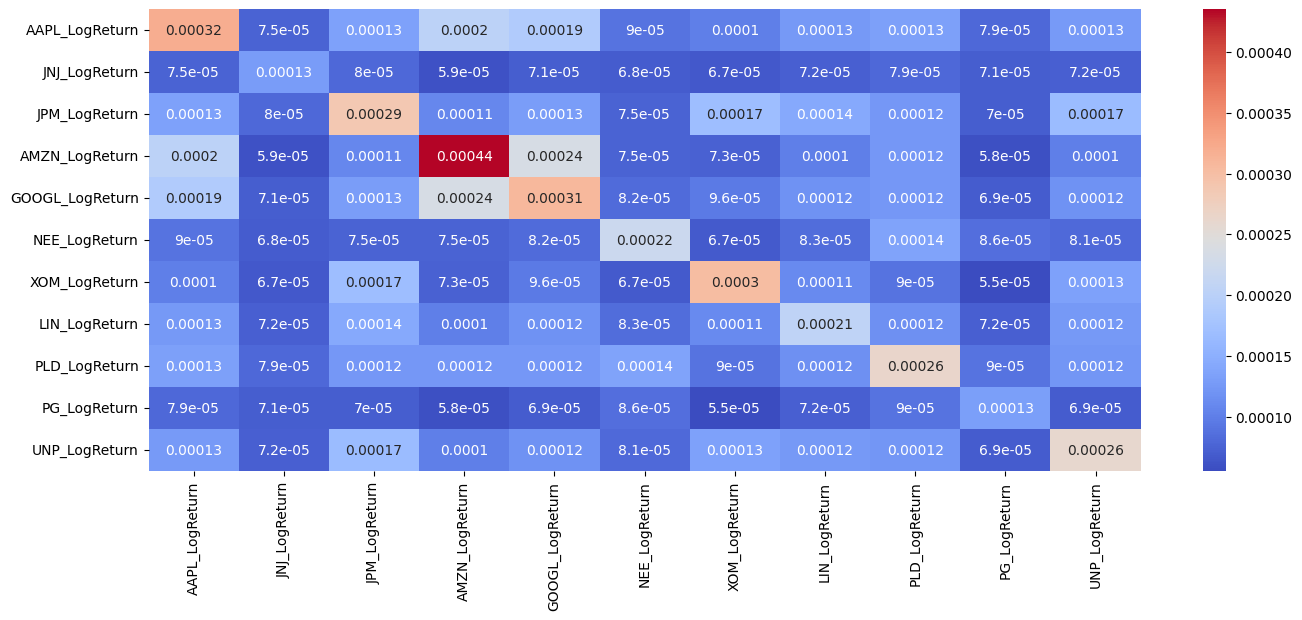

In [560]:
sns.heatmap(log_returns.cov(),annot=True,
            cmap='coolwarm')

In [561]:
mean_return = log_returns.mean()

volatility = log_returns.std()

print(f'Mean Return:\n{mean_return}')
print('-'*30)
print(f'Volatility:\n{volatility}')

Mean Return:
AAPL_LogReturn     0.000958
JNJ_LogReturn      0.000324
JPM_LogReturn      0.000535
AMZN_LogReturn     0.000808
GOOGL_LogReturn    0.000641
NEE_LogReturn      0.000523
XOM_LogReturn      0.000172
LIN_LogReturn      0.000536
PLD_LogReturn      0.000626
PG_LogReturn       0.000352
UNP_LogReturn      0.000516
dtype: float64
------------------------------
Volatility:
AAPL_LogReturn     0.017885
JNJ_LogReturn      0.011359
JPM_LogReturn      0.016947
AMZN_LogReturn     0.020857
GOOGL_LogReturn    0.017537
NEE_LogReturn      0.014846
XOM_LogReturn      0.017397
LIN_LogReturn      0.014353
PLD_LogReturn      0.016254
PG_LogReturn       0.011475
UNP_LogReturn      0.016162
dtype: float64


In [562]:
np.random.seed(101)

num_ports = 10000

all_weights = np.zeros((num_ports,len(sectors)))
return_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):
    
    weights = np.random.random(len(sectors))
    weights = weights/np.sum(weights)
    
    all_weights[i,:] = weights

    return_arr[i] = sum((log_returns.mean() * weights)*252)
    
    vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))

    sharpe_arr[i] = return_arr[i]/vol_arr[i]


In [563]:
results_df = pd.DataFrame({
    'Return': return_arr,
    'Volatility': vol_arr,
    'Sharpe Ratio': sharpe_arr
})

results_df

,Return,Volatility,Sharpe Ratio
0,0.140257,0.173159,0.809988
1,0.138077,0.180214,0.766183
2,0.133678,0.175048,0.763665
3,0.127108,0.170520,0.745409
4,0.125236,0.178377,0.702083
...,...,...,...
9995,0.133034,0.173865,0.765158
9996,0.138567,0.177326,0.781425
9997,0.137721,0.170494,0.807776
9998,0.127720,0.171985,0.742621


In [564]:
weights_df = pd.DataFrame(all_weights, columns=tickers)

weights_df

,AAPL,JNJ,JPM,AMZN,GOOGL,NEE,XOM,LIN,PLD,PG,UNP
0,0.094362,0.104279,0.005203,0.031342,0.125221,0.152379,0.056092,0.163291,0.131848,0.034708,0.101275
1,0.065053,0.033603,0.145133,0.178365,0.042925,0.015437,0.111500,0.134675,0.051033,0.126604,0.095671
2,0.008263,0.023495,0.031862,0.169449,0.088730,0.098636,0.125226,0.092360,0.155617,0.137684,0.068678
3,0.054111,0.144338,0.052052,0.131042,0.125767,0.081518,0.139732,0.014715,0.015579,0.106261,0.134886
4,0.035413,0.061161,0.149254,0.036466,0.155663,0.108226,0.151070,0.115753,0.009632,0.049701,0.127662
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.079261,0.086938,0.072718,0.061119,0.001040,0.082240,0.109706,0.151728,0.163283,0.059275,0.132693
9996,0.120447,0.102355,0.179323,0.115198,0.093230,0.061858,0.104471,0.003038,0.035814,0.103366,0.080901
9997,0.071118,0.157753,0.057622,0.109457,0.039180,0.010582,0.028719,0.135396,0.152222,0.112072,0.125880
9998,0.044122,0.152987,0.068114,0.002556,0.091066,0.059391,0.077103,0.157870,0.157785,0.044246,0.144762


In [565]:
index_max_sp = sharpe_arr.argmax()

sharpe_ret_max = return_arr[index_max_sp]

sharpe_vol_max = vol_arr[index_max_sp]

In [566]:
index_min_vol = vol_arr.argmin()

sharpe_ret = return_arr[index_min_vol]

sharpe_vol_min = vol_arr[index_min_vol]

In [567]:
index_max_ret = return_arr.argmax()

sharpe_ret_max2 = return_arr[index_max_ret]

sharpe_vol = vol_arr[index_max_ret]

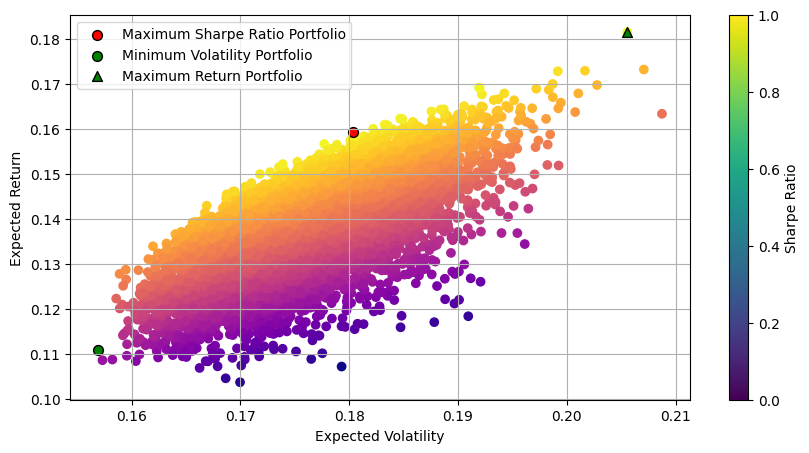

In [568]:
plt.figure(figsize=(10,5))

plt.scatter(vol_arr,return_arr,c=sharpe_arr,cmap='plasma')

plt.scatter(sharpe_vol_max,sharpe_ret_max,color='red',s=50,edgecolors='black',marker='o',label='Maximum Sharpe Ratio Portfolio')

plt.scatter(sharpe_vol_min,sharpe_ret,color='green',s=50,edgecolors='black',marker='o',label='Minimum Volatility Portfolio')

plt.scatter(sharpe_vol,sharpe_ret_max2,color='green',s=50,edgecolors='black',marker='^',label='Maximum Return Portfolio')

plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Expected Volatility')

plt.ylabel('Expected Return')

plt.grid(True)

plt.legend()

In [569]:
from scipy.optimize import minimize

def get_ret_vol_sp(weights):
    
    weights = np.array(weights)
    
    ret = np.sum(log_returns.mean() * weights)*252
    
    vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    
    sp = ret/vol
    
    return np.array([ret,vol,sp])

def neg_sharpe(weights):
    
    return get_ret_vol_sp(weights)[2] * -1

def check_sum(weights):
    
    return np.sum(weights) - 1

In [570]:
cons = {'type':'eq','fun':check_sum}

bounds = [(0,1)]*len(sectors)

init_guess = np.ones(len(sectors))/len(sectors)

opt_result = minimize(neg_sharpe,init_guess,bounds=bounds,constraints=cons,method='SLSQP',tol=1e-9)
    
opt_result.x

array([4.49090759e-01, 1.38291762e-02, 1.05316293e-02, 1.15287985e-01,
       2.23990848e-17, 2.00411074e-01, 5.95469456e-18, 9.44868649e-02,
       8.22279535e-02, 1.54762890e-02, 1.86582689e-02])

In [571]:
get_ret_vol_sp(opt_result.x)

array([0.19037833, 0.20621395, 0.92320784])

In [572]:
frontier_y = np.linspace(return_arr.min(),return_arr.max(),300)

def minimize_vol(weights):
    
    return get_ret_vol_sp(weights)[1]

frontier_volatility = []

for possible_return in frontier_y:
    
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w: get_ret_vol_sp(w)[0]-possible_return})
    
    result = minimize(minimize_vol,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])
    
frontier_volatility

[0.1503933533579669,
 0.15042001016814066,
 0.15044757570962938,
 0.15047604626102892,
 0.15050541558445416,
 0.15053567986581948,
 0.15056684249621327,
 0.1505989053816328,
 0.1506318638369388,
 0.15066570952913402,
 0.15070043337046501,
 0.15073602894521682,
 0.1507724939407751,
 0.15080982940401585,
 0.1508480381256565,
 0.15088712502062915,
 0.1509270927122388,
 0.15096793950944318,
 0.15100966547865097,
 0.15105227053580608,
 0.1510957544329011,
 0.15114012625851161,
 0.15118537596795803,
 0.1512315028205769,
 0.15127850605652624,
 0.15132638486264544,
 0.15137513838930022,
 0.1514247657547211,
 0.15147526605682965,
 0.151526638379114,
 0.1515788817985635,
 0.15163219055973282,
 0.1516864003179849,
 0.15174146614997497,
 0.1517963936818822,
 0.15185302992263794,
 0.15191054528491235,
 0.151968939041828,
 0.1520282107122021,
 0.15208836003691067,
 0.1521493868995427,
 0.15221129127142077,
 0.15227409527519722,
 0.15233777953636946,
 0.15240230159343224,
 0.15246766086257588,
 0.152

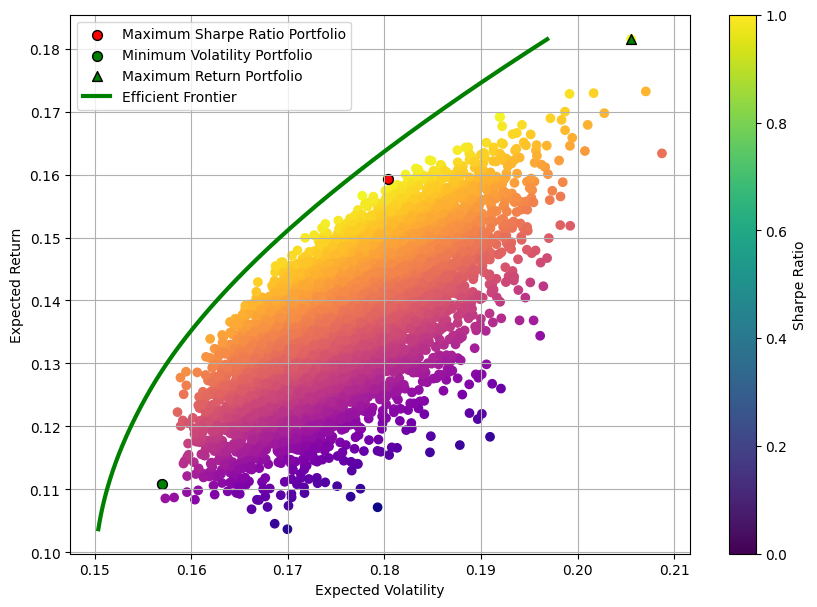

In [573]:
plt.figure(figsize=(10,7))

plt.scatter(vol_arr,return_arr,c=sharpe_arr,cmap='plasma')

plt.scatter(sharpe_vol_max,sharpe_ret_max,color='red',s=50,edgecolors='black',marker='o',label='Maximum Sharpe Ratio Portfolio')

plt.scatter(sharpe_vol_min,sharpe_ret,color='green',s=50,edgecolors='black',marker='o',label='Minimum Volatility Portfolio')

plt.scatter(sharpe_vol,sharpe_ret_max2,color='green',s=50,edgecolors='black',marker='^',label='Maximum Return Portfolio')

plt.plot(frontier_volatility,frontier_y,color='green',lw=3,label='Efficient Frontier')

plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Expected Volatility')

plt.ylabel('Expected Return')

plt.grid(True)

plt.legend()

In [574]:
# Backtesting the 3 major portfolios

balance = 1000000

pf1 = balance*sharpe_ret_max*100

pf2 = balance*sharpe_ret*100

pf3 = balance*sharpe_ret_max2*100

print('Max Sharpe Ratio Portfolio :',pf1)
print('Min Volatility Portfolio :',pf2)
print('Max Return Portfolio :',pf3)

Max Sharpe Ratio Portfolio : 15929124.599815222
Min Volatility Portfolio : 11085052.534157401
Max Return Portfolio : 18149223.683498036


------------

## ETFs Portfolios

In [575]:
etf_tickers = ['SPY', 'QQQ', 'EEM', 'VTI', 'LQD']

startDate = '2014-01-01'
endDate = '2024-01-01'
data_etf = pd.DataFrame()

for ticker in etf_tickers:
    
    data_etf[ticker] = yf.download(ticker,startDate,endDate)['Adj Close']
    
data_etf.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [576]:
data_etf.head()

,SPY,QQQ,EEM,VTI,LQD
Date,,,,,
2014-01-02,151.706833,79.784904,32.052189,79.087265,80.518715
2014-01-03,151.681946,79.208954,31.996363,79.070618,80.638359
2014-01-06,151.242432,78.916382,31.693306,78.862648,80.814285
2014-01-07,152.171234,79.647766,31.828882,79.370094,80.750946
2014-01-08,152.204483,79.821487,31.725203,79.428307,80.406067


<Axes: xlabel='Date'>

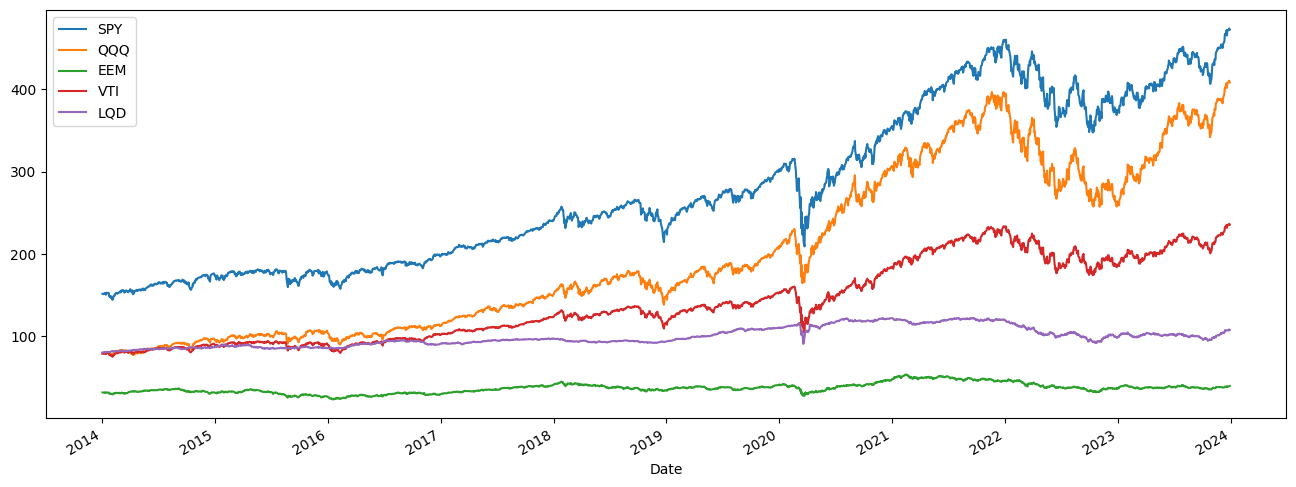

In [577]:
data_etf.plot()

<Axes: >

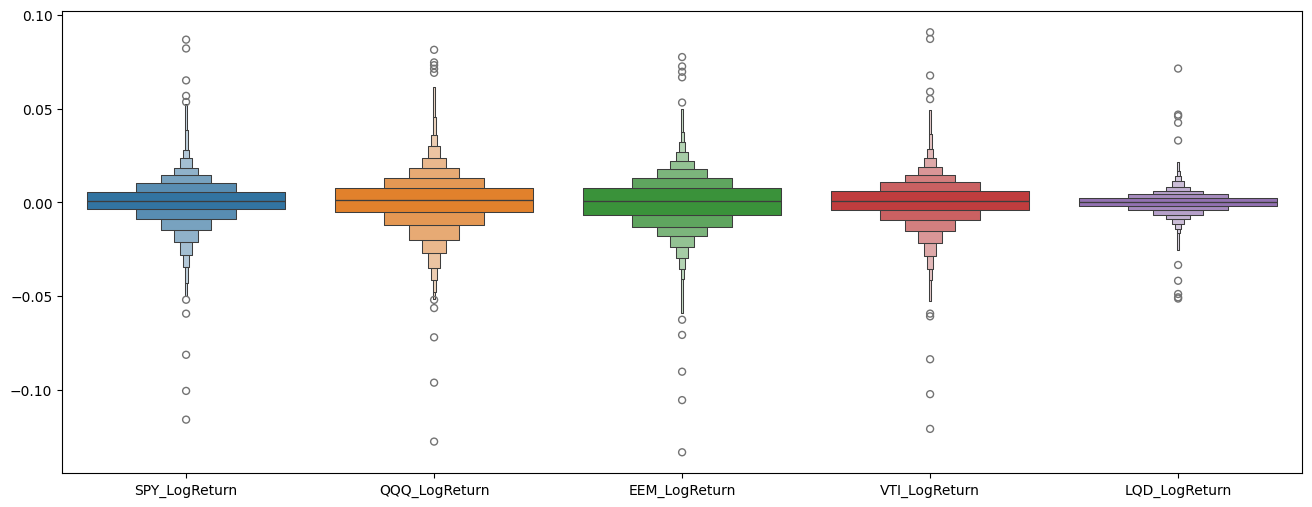

In [578]:
etf_log_return = pd.DataFrame()

for ticker in data_etf.columns:
    
    etf_log_return[ticker+'_LogReturn'] = np.log(data_etf[ticker]/data_etf[ticker].shift(1)).dropna()

sns.boxenplot(etf_log_return)

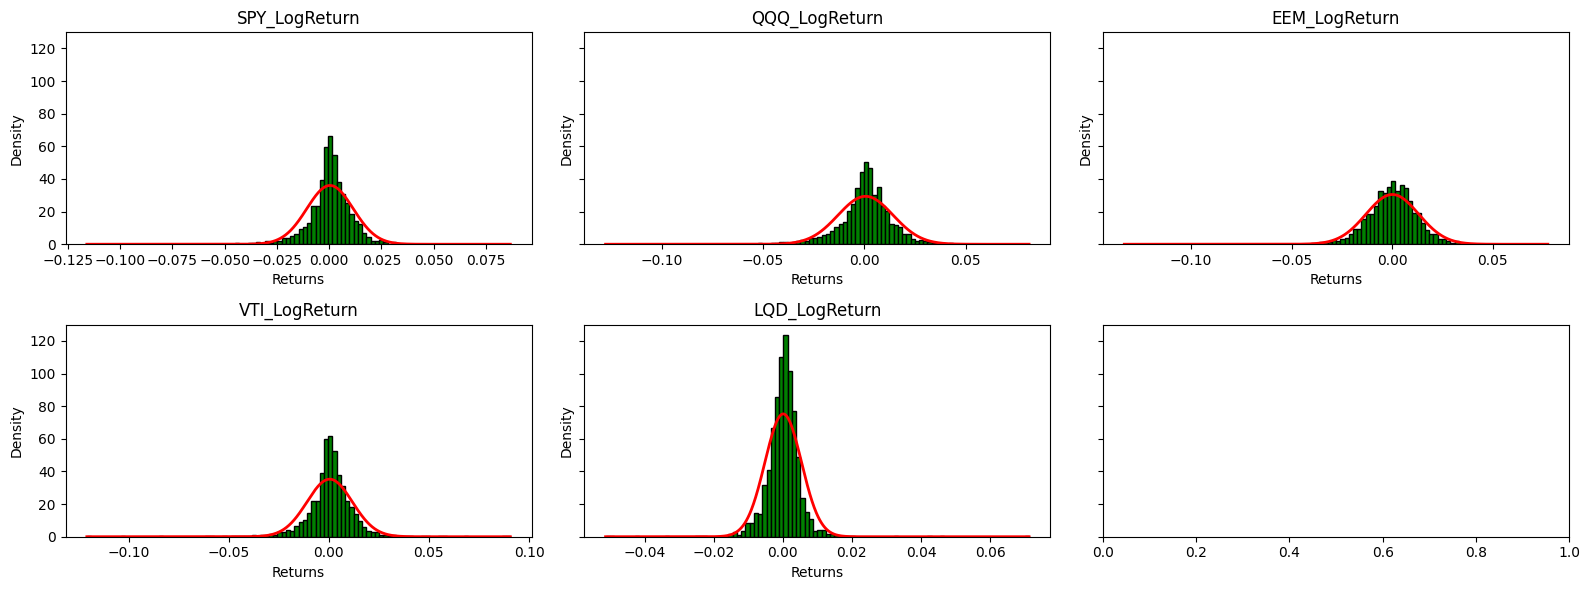

In [579]:
fig, axes = plt.subplots(2,3,sharey=True)

axes= axes.flatten()

for i, ticker in enumerate(etf_log_return.columns):
    # Plot histogram of returns
    mu,std = stats.norm.fit(etf_log_return[ticker])
    xmax,xmin = etf_log_return[ticker].max(),etf_log_return[ticker].min()
    
    x = np.linspace(xmin, xmax, 1000)
    y = stats.norm.pdf(x, mu, std)
    
    axes[i].hist(etf_log_return[ticker], bins=100, color='green', density=True,edgecolor='black')
    
    axes[i].plot(x,y,lw=2,color='red')
    axes[i].set_title(ticker)
    axes[i].set_xlabel('Returns')
    axes[i].set_ylabel('Density')
    
plt.tight_layout()
plt.show()

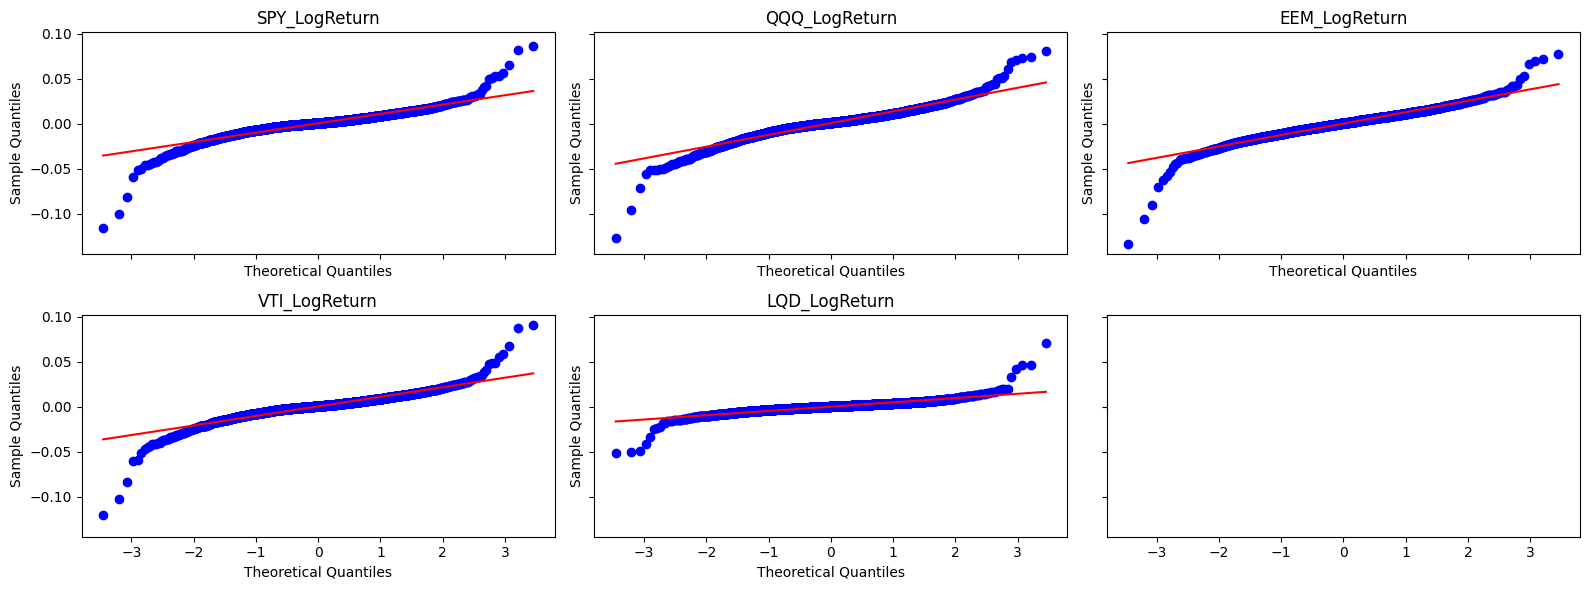

In [580]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)

axes = axes.flatten()

for i, ticker in enumerate(etf_log_return.columns):
    
    stats.probplot(etf_log_return[ticker], dist="norm",plot=axes[i])
    axes[i].set_title(ticker)
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()

<Axes: >

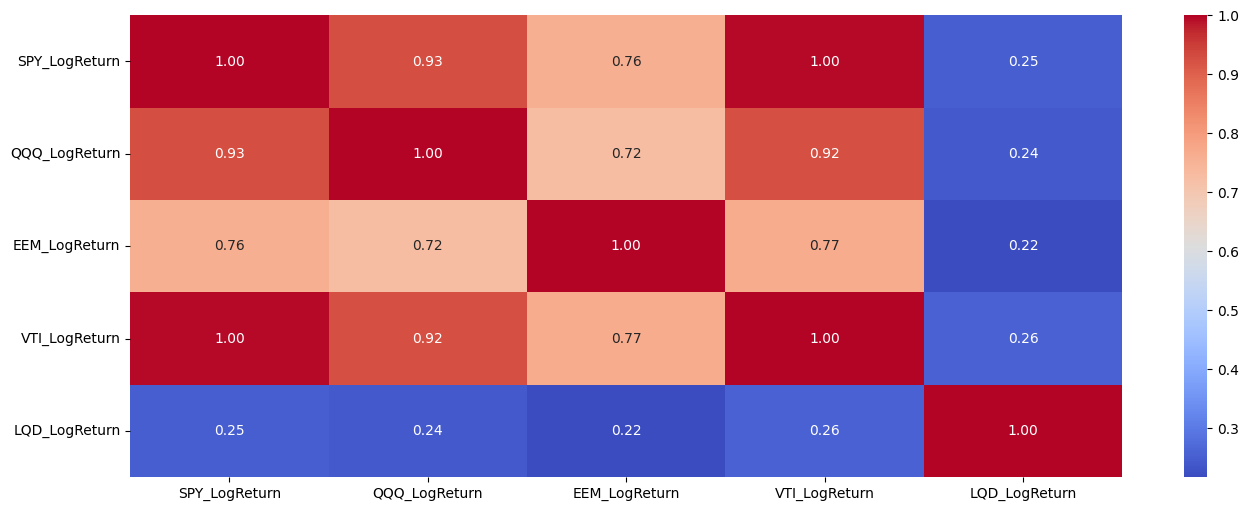

In [581]:
sns.heatmap(etf_log_return.corr(),annot=True,
            cmap='coolwarm',fmt='.2f')

In [582]:
high_corr_pairs = []

for i in range(len(etf_log_return.corr().columns)):
    for j in range(i+1,len(etf_log_return.corr().columns)):
        if etf_log_return.corr().iloc[i,j] >= 0.5:
            high_corr_pairs.append((etf_log_return.corr().columns[i],etf_log_return.corr().columns[j],etf_log_return.corr().iloc[i,j]))

print('Pairs with correlation higher than 0.5:')
print('-'*50)         
high_corr_pairs

Pairs with correlation higher than 0.5:
--------------------------------------------------


[('SPY_LogReturn', 'QQQ_LogReturn', 0.9288930220557695),
 ('SPY_LogReturn', 'EEM_LogReturn', 0.7612063182700058),
 ('SPY_LogReturn', 'VTI_LogReturn', 0.9959300755514818),
 ('QQQ_LogReturn', 'EEM_LogReturn', 0.7246027701506744),
 ('QQQ_LogReturn', 'VTI_LogReturn', 0.924645156513653),
 ('EEM_LogReturn', 'VTI_LogReturn', 0.7673778017682398)]

<Axes: >

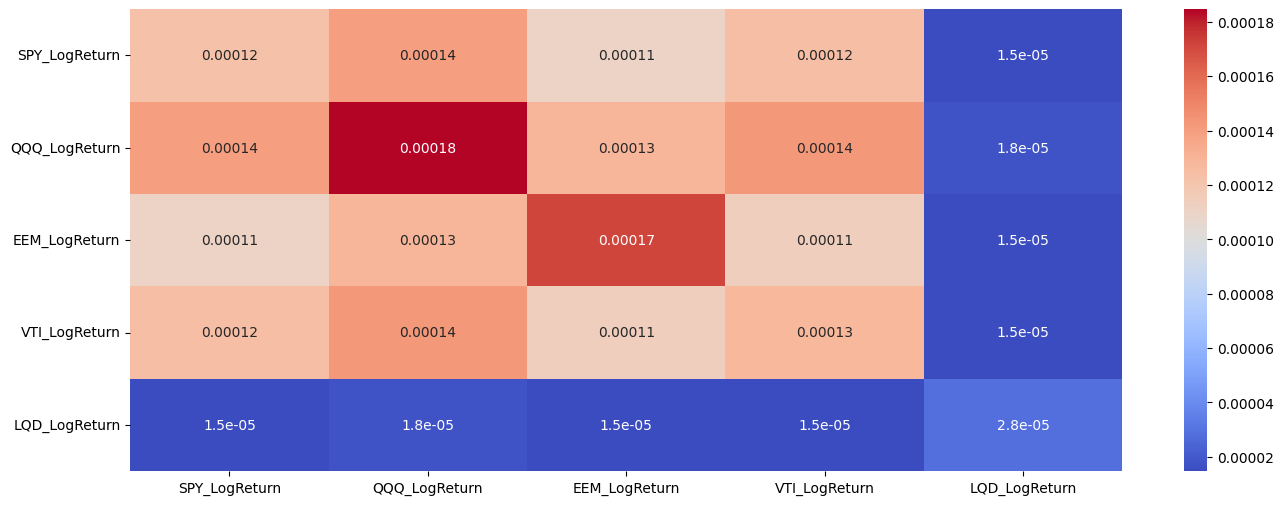

In [583]:
sns.heatmap(etf_log_return.cov(),annot=True,
            cmap='coolwarm')

In [584]:
etf_mean_return = etf_log_return.mean()

etf_volatility = etf_log_return.std()

print(f'Mean Return:\n{etf_mean_return}')
print('-'*30)
print(f'Volatility:\n{etf_volatility}')

Mean Return:
SPY_LogReturn    0.000452
QQQ_LogReturn    0.000649
EEM_LogReturn    0.000087
VTI_LogReturn    0.000434
LQD_LogReturn    0.000116
dtype: float64
------------------------------
Volatility:
SPY_LogReturn    0.011078
QQQ_LogReturn    0.013587
EEM_LogReturn    0.013090
VTI_LogReturn    0.011314
LQD_LogReturn    0.005301
dtype: float64


In [586]:
np.random.seed(101)

num_ports = 10000

all_weights = np.zeros((num_ports,len(data_etf.columns)))
return_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):
    
    weights = np.random.random(len(data_etf.columns))
    weights = weights/np.sum(weights)
    
    all_weights[i,:] = weights

    return_arr[i] = sum((etf_log_return.mean() * weights)*252)
    
    vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(etf_log_return.cov()*252,weights)))

    sharpe_arr[i] = return_arr[i]/vol_arr[i]

Text(0, 0.5, 'Weights')

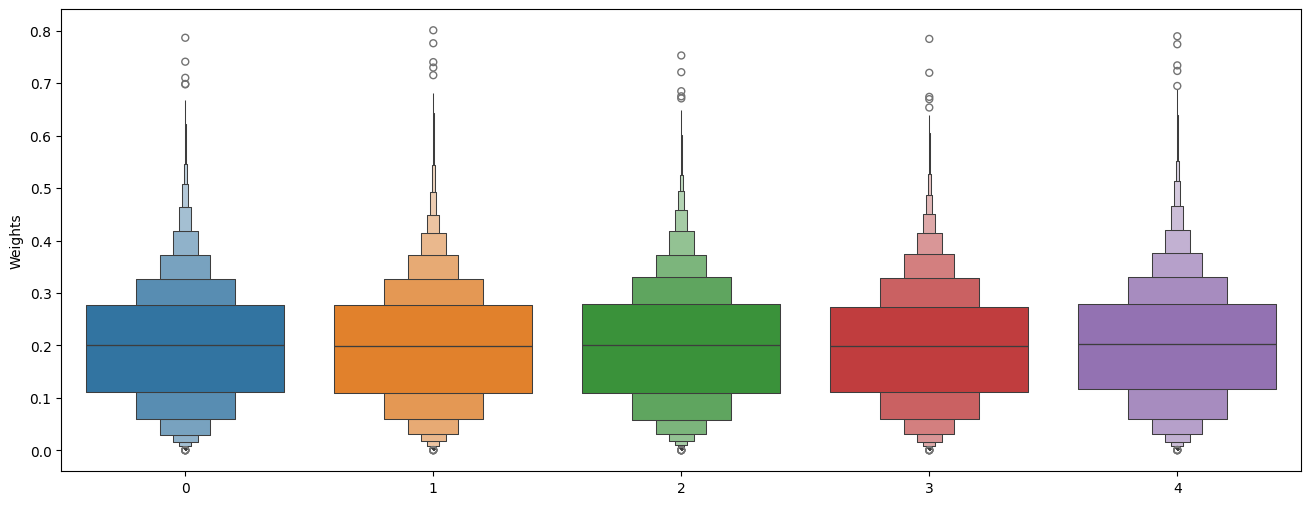

In [599]:
sns.boxenplot(all_weights)
plt.ylabel('Weights')

In [588]:
index_max_sp = sharpe_arr.argmax()

sharpe_ret_max = return_arr[index_max_sp]

sharpe_vol_max = vol_arr[index_max_sp]

In [589]:
index_min_vol = vol_arr.argmin()

sharpe_ret = return_arr[index_min_vol]

sharpe_vol_min = vol_arr[index_min_vol]

In [590]:
index_max_ret = return_arr.argmax()

sharpe_ret_max2 = return_arr[index_max_ret]

sharpe_vol = vol_arr[index_max_ret]

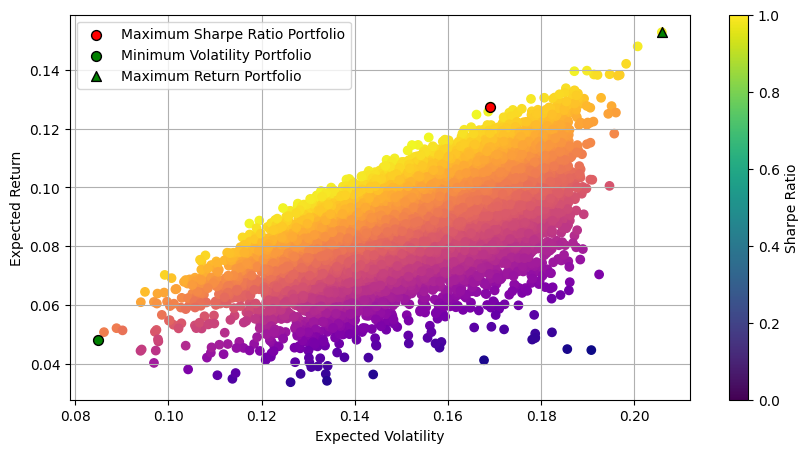

In [591]:
plt.figure(figsize=(10,5))

plt.scatter(vol_arr,return_arr,c=sharpe_arr,cmap='plasma')

plt.scatter(sharpe_vol_max,sharpe_ret_max,color='red',s=50,edgecolors='black',marker='o',label='Maximum Sharpe Ratio Portfolio')

plt.scatter(sharpe_vol_min,sharpe_ret,color='green',s=50,edgecolors='black',marker='o',label='Minimum Volatility Portfolio')

plt.scatter(sharpe_vol,sharpe_ret_max2,color='green',s=50,edgecolors='black',marker='^',label='Maximum Return Portfolio')

plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Expected Volatility')

plt.ylabel('Expected Return')

plt.grid(True)

plt.legend()

In [592]:
from scipy.optimize import minimize

def get_ret_vol_sp(weights):
    
    weights = np.array(weights)
    
    ret = np.sum(etf_log_return.mean() * weights)*252
    
    vol = np.sqrt(np.dot(weights.T,np.dot(etf_log_return.cov()*252,weights)))
    
    sp = ret/vol
    
    return np.array([ret,vol,sp])

def neg_sharpe(weights):
    
    return get_ret_vol_sp(weights)[2] * -1

def check_sum(weights):
    
    return np.sum(weights) - 1

In [593]:
cons = {'type':'eq','fun':check_sum}

bounds = [(0,1)]*len(data_etf.columns)

init_guess = np.ones(len(data_etf.columns))/len(data_etf.columns)

opt_result = minimize(neg_sharpe,init_guess,bounds=bounds,constraints=cons,method='SLSQP',tol=1e-9)
    
opt_result.x

array([1.24417630e-16, 6.17476895e-01, 0.00000000e+00, 0.00000000e+00,
       3.82523105e-01])

In [594]:
get_ret_vol_sp(opt_result.x)

array([0.11221575, 0.14444728, 0.77686299])

In [595]:
frontier_y = np.linspace(return_arr.min(),return_arr.max(),300)

def minimize_vol(weights):
    
    return get_ret_vol_sp(weights)[1]

frontier_volatility = []

for possible_return in frontier_y:
    
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w: get_ret_vol_sp(w)[0]-possible_return})
    
    result = minimize(minimize_vol,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])
    
frontier_volatility

[0.08200406823690495,
 0.0819764566803469,
 0.08195201059446958,
 0.08193007650360297,
 0.08191192908135973,
 0.08189711882928606,
 0.0818846882611448,
 0.08187590218261952,
 0.08187027655377331,
 0.08186781202565446,
 0.0818685088828383,
 0.08187236704618653,
 0.081879550254944,
 0.08189020835423802,
 0.0819029040054816,
 0.08192123610267908,
 0.08194779507563982,
 0.08198263271583663,
 0.08202573847470304,
 0.08207709932502984,
 0.08213669978060761,
 0.08220452192001929,
 0.08228054541465392,
 0.08236474755066078,
 0.08245710327452907,
 0.08255758522265838,
 0.08266616376366145,
 0.08278280703757594,
 0.08290748100340753,
 0.08304010655771968,
 0.08317804857356548,
 0.08331975650885513,
 0.08346521122010993,
 0.08361439312799383,
 0.08376728233776584,
 0.08392385859137058,
 0.08408410130085982,
 0.08424798953033846,
 0.08441550205480539,
 0.08458661733994816,
 0.08476131357159866,
 0.0849395686528991,
 0.08512136021273659,
 0.08530666565496564,
 0.08549546212457486,
 0.08568772654316

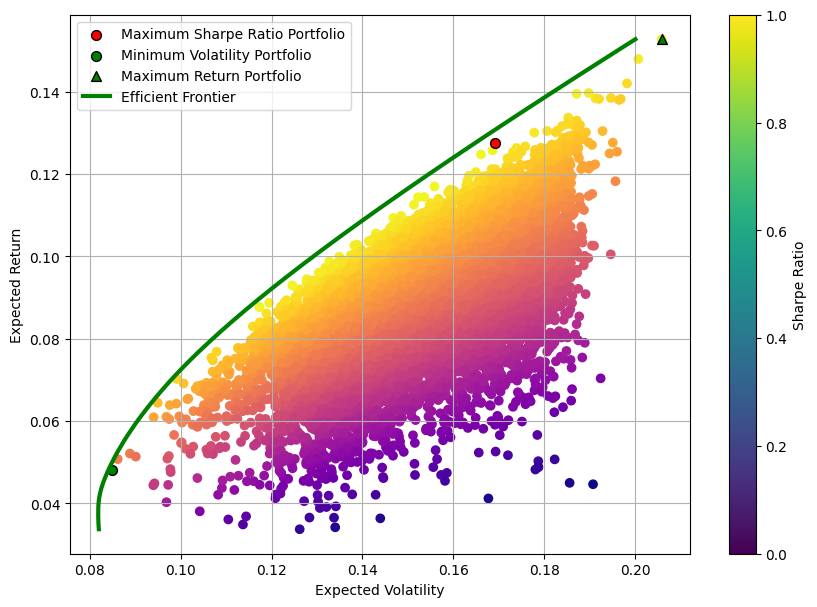

In [596]:
plt.figure(figsize=(10,7))

plt.scatter(vol_arr,return_arr,c=sharpe_arr,cmap='plasma')

plt.scatter(sharpe_vol_max,sharpe_ret_max,color='red',s=50,edgecolors='black',marker='o',label='Maximum Sharpe Ratio Portfolio')

plt.scatter(sharpe_vol_min,sharpe_ret,color='green',s=50,edgecolors='black',marker='o',label='Minimum Volatility Portfolio')

plt.scatter(sharpe_vol,sharpe_ret_max2,color='green',s=50,edgecolors='black',marker='^',label='Maximum Return Portfolio')

plt.plot(frontier_volatility,frontier_y,color='green',lw=3,label='Efficient Frontier')

plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Expected Volatility')

plt.ylabel('Expected Return')

plt.grid(True)

plt.legend()

In [597]:
sharpe_ret*100

4.807161643285996

In [598]:
# Backtesting the 3 major portfolios

balance = 1000000

pf1 = balance*sharpe_ret_max*100

pf2 = balance*sharpe_ret*100

pf3 = balance*sharpe_ret_max2*100

print('Max Sharpe Ratio Portfolio :',pf1)
print('Min Volatility Portfolio :',pf2)
print('Max Return Portfolio :',pf3)

Max Sharpe Ratio Portfolio : 12745983.033551406
Min Volatility Portfolio : 4807161.643285996
Max Return Portfolio : 15277232.387856048


- Investment Performance Analysis: Stocks vs. ETFs (2014-2024)

 In our recent case study, we applied mean-variance optimization to analyze portfolios composed of stocks and ETFs over the period from 2014 to 2024. The study focused on three key portfolio strategies: minimizing volatility, maximizing return, and maximizing the Sharpe ratio.

- Key Findings:

   - Superior Stock Performance: The analysis revealed that portfolios consisting of individual stocks significantly outperformed those composed of ETFs. This was evident across various performance metrics, including total returns and Sharpe ratios.

   - Higher Returns: Stocks, known for their higher risk-return profile, delivered superior gains compared to ETFs, which typically offer diversification benefits but with potentially lower returns.

   - Risk Considerations: While stocks demonstrated higher returns, they also came with increased volatility. This underscores the trade-off between potential returns and risk.

- Implications:

    - Re-evaluation of Investment Strategies: Investors may consider re-evaluating their strategies, especially if their goals include maximizing returns. However, the higher risk associated with stocks must be weighed against the stability offered by ETFs.

    - Diversification Benefits: Despite the higher returns from stocks, ETFs' diversification can provide risk management advantages, particularly during market downturns.

- Conclusion:

  The findings highlight the importance of aligning investment choices with personal risk tolerance and financial goals. While stocks may offer greater returns, the stability and risk mitigation of ETFs remain valuable components of a balanced portfolio.